In [50]:
# Python 3.7+

# Bibliotecas padrão
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import vstack, hstack
from sklearn import tree

# Estilo dos gráficos
plt.style.use('seaborn-v0_8')

# Função para calcular o ATR
def ATR(df, n):
    high = df['High']
    low = df['Low']
    close = df['Close']

    tr1 = high - low
    tr2 = (high - close.shift()).abs()
    tr3 = (low - close.shift()).abs()

    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    atr = tr.ewm(span=n, min_periods=n).mean()
    return atr


# Caminhos dos arquivos (ajuste conforme necessário)
mnq_path = "/content/mnq-s15-last-2024-12-29-2025-05-04.xlsx"
xauusd_path = "/content/xauusd-s15-mid-2024-12-29-2025-05-04.csv"

# Leitura dos arquivos
MNQ = pd.read_excel(mnq_path)
XAUUSD = pd.read_csv(xauusd_path)

# Função auxiliar para limpar e configurar os dados
def prepare_ohlc(df):
    # Normaliza os nomes das colunas
    df.columns = [col.strip().capitalize() for col in df.columns]

    # Remove 'Volume' se existir
    if 'Volume' in df.columns:
        df.drop('Volume', axis=1, inplace=True)

    # Converte o índice para datetime
    df.index = pd.to_datetime(df.index)

    return df

MNQ = prepare_ohlc(MNQ)
XAUUSD = prepare_ohlc(XAUUSD)

# Pronto: você pode usar `MNQ` e `XAUUSD` como os antigos `PEP` and `KO`

In [51]:
MNQ

,Timestamp,Open,High,Low,Close
1970-01-01 00:00:00.000000000,2024-12-29 18:00:00-05:00,21710.75,21736.00,21707.25,21732.50
1970-01-01 00:00:00.000000001,2024-12-29 18:00:15-05:00,21732.50,21742.50,21729.00,21737.50
1970-01-01 00:00:00.000000002,2024-12-29 18:00:30-05:00,21737.00,21741.75,21736.75,21739.25
1970-01-01 00:00:00.000000003,2024-12-29 18:00:45-05:00,21738.50,21742.50,21734.25,21735.50
1970-01-01 00:00:00.000000004,2024-12-29 18:01:00-05:00,21734.50,21740.00,21734.00,21736.50
...,...,...,...,...,...
1970-01-01 00:00:00.000725995,2025-05-04 19:58:45-04:00,20084.25,20084.25,20081.50,20082.00
1970-01-01 00:00:00.000725996,2025-05-04 19:59:00-04:00,20081.75,20084.00,20080.50,20083.50
1970-01-01 00:00:00.000725997,2025-05-04 19:59:15-04:00,20083.25,20084.50,20081.75,20083.25
1970-01-01 00:00:00.000725998,2025-05-04 19:59:30-04:00,20083.50,20083.75,20082.25,20082.50


In [40]:
XAUUSD

,Timestamp,Open,High,Low,Close
1970-01-01 00:00:00.000000000,2024-12-29 18:00:00-05:00,2620.6345,2620.7500,2619.6695,2620.5500
1970-01-01 00:00:00.000000001,2024-12-29 18:00:15-05:00,2620.5500,2620.5500,2619.4250,2619.4585
1970-01-01 00:00:00.000000002,2024-12-29 18:00:30-05:00,2619.4530,2620.2500,2619.4195,2620.2500
1970-01-01 00:00:00.000000003,2024-12-29 18:00:45-05:00,2620.2515,2620.3065,2619.8815,2619.8815
1970-01-01 00:00:00.000000004,2024-12-29 18:01:00-05:00,2619.8500,2621.0965,2619.8365,2620.1515
...,...,...,...,...,...
1970-01-01 00:00:00.000713755,2025-05-02 16:58:45-04:00,3241.1050,3241.2400,3240.8550,3240.9250
1970-01-01 00:00:00.000713756,2025-05-02 16:59:00-04:00,3241.0000,3241.1350,3240.8800,3240.9750
1970-01-01 00:00:00.000713757,2025-05-02 16:59:15-04:00,3240.9250,3240.9250,3240.1150,3240.3250
1970-01-01 00:00:00.000713758,2025-05-02 16:59:30-04:00,3240.3450,3240.6000,3240.3150,3240.3300


In [45]:
# 1. Garantir que Timestamp seja datetime e índice
# MNQ['Timestamp'] = pd.to_datetime(MNQ['Timestamp'])
# XAUUSD['Timestamp'] = pd.to_datetime(XAUUSD['Timestamp'])

# MNQ.set_index('Timestamp', inplace=True)
# XAUUSD.set_index('Timestamp', inplace=True)

# 2. Alinhar pelo índice (timestamp) — inner join
df = pd.DataFrame({
    'MNQ_Open': MNQ['Open'],
    'MNQ_Close': MNQ['Close'],
    'XAU_Open': XAUUSD['Open'],
    'XAU_Close': XAUUSD['Close']
}).dropna()

# 3. Calcular retornos com shift
df['TMNQ'] = (df['MNQ_Close'] / df['MNQ_Close'].shift(7) - 1).shift(1)
df['TXAU'] = (df['XAU_Close'] / df['XAU_Close'].shift(6) - 1).shift(1)

# 4. Construir lógica de sinal
df['Target'] = df[['TMNQ', 'TXAU']].min(axis=1)
df['IsMNQ']  = df['Target'] == df['TMNQ']

df['Open']  = np.where(df['IsMNQ'], df['MNQ_Open'], df['XAU_Open'])
df['Close'] = np.where(df['IsMNQ'], df['MNQ_Close'], df['XAU_Close'])

df['Returns'] = df['Close'] / df['Open'] - 1

# 5. Calcular ATR com base no MNQ (precisa alinhar índice)
df['ATR'] = ATR(MNQ.loc[df.index], 40)

# 6. Extras e limpeza
df['AMNQ'] = df['MNQ_Open']
df['AXAU'] = df['XAU_Open']

df = df.dropna().reset_index(drop=True)

# # 7. Definir features
features = ['IsMNQ', 'AXAU', 'ATR', 'AMNQ']


In [46]:
df

,MNQ_Open,MNQ_Close,XAU_Open,XAU_Close,TMNQ,TXAU,Target,IsMNQ,Open,Close,Returns,ATR,AMNQ,AXAU
0,21727.25,21724.00,2622.4000,2622.3865,-0.000196,0.000012,-0.000196,True,21727.250,21724.00,-0.000150,4.929884,21727.25,2622.4000
1,21723.50,21722.25,2622.3500,2622.3500,-0.000265,0.000033,-0.000265,True,21723.500,21722.25,-0.000058,4.905817,21723.50,2622.3500
2,21722.50,21721.75,2622.3720,2622.3715,-0.000380,0.000000,-0.000380,True,21722.500,21721.75,-0.000035,4.730404,21722.50,2622.3720
3,21721.00,21720.25,2622.4215,2622.9565,-0.000483,-0.000106,-0.000483,True,21721.000,21720.25,-0.000035,4.731485,21721.00,2622.4215
4,21720.25,21717.75,2623.0000,2622.9520,-0.000449,0.000246,-0.000449,True,21720.250,21717.75,-0.000115,4.650217,21720.25,2623.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480279,20198.00,20199.25,3241.1050,3240.9250,-0.000062,0.000244,-0.000062,True,20198.000,20199.25,0.000062,2.691666,20198.00,3241.1050
480280,20199.75,20200.25,3241.0000,3240.9750,-0.000012,0.000139,-0.000012,True,20199.750,20200.25,0.000025,2.792073,20199.75,3241.0000
480281,20201.75,20200.75,3240.9250,3240.3250,0.000099,0.000184,0.000099,True,20201.750,20200.75,-0.000050,2.814411,20201.75,3240.9250
480282,20202.50,20202.00,3240.3450,3240.3300,0.000161,-0.000216,-0.000216,False,3240.345,3240.33,-0.000005,2.799074,20202.50,3240.3450


In [47]:
training = 38
testing = 3
seed = 123

returns = []

# Rolling calibration and testing of the Decision Tree Regressors
for ii in range(0, len(df) - (training + testing), testing):
    X, y = [], []

    iam  = ii + training
    lazy = ii + training + testing

    # Training com os últimos 38 períodos
    for i in range(ii, iam):
        X.append([df.iloc[i][var] for var in features])
        y.append(df.iloc[i]['Close'])

    model = tree.DecisionTreeRegressor(
        max_depth=19,
        min_samples_leaf=3,
        min_samples_split=16,
        random_state=seed
    )
    model.fit(vstack(X), hstack(y))

    XX = []

    # Teste fora da amostra (3 períodos à frente)
    for i in range(iam, lazy):
        XX.append([df.iloc[i][var] for var in features])

    # Entramos na operação se o preço previsto for maior que o de abertura
    trades = np.where(
        model.predict(vstack(XX)) > df['Open'][iam:lazy].values,
        df['Returns'][iam:lazy].values,
        np.nan
    )

    for values in trades:
        returns.append(values)


In [48]:
# Criar DataFrame de comparação de retornos
CompRes = pd.DataFrame({
    'Baseline': df['Returns'].iloc[-len(returns):].values,
    'DTR': returns
})

# Estatísticas descritivas do retorno baseline
print(CompRes['Baseline'].describe())


count    4.802430e+05
mean     5.681654e-07
std      2.188786e-04
min     -1.169022e-02
25%     -6.387788e-05
50%      0.000000e+00
75%      6.685756e-05
max      1.261937e-02
Name: Baseline, dtype: float64


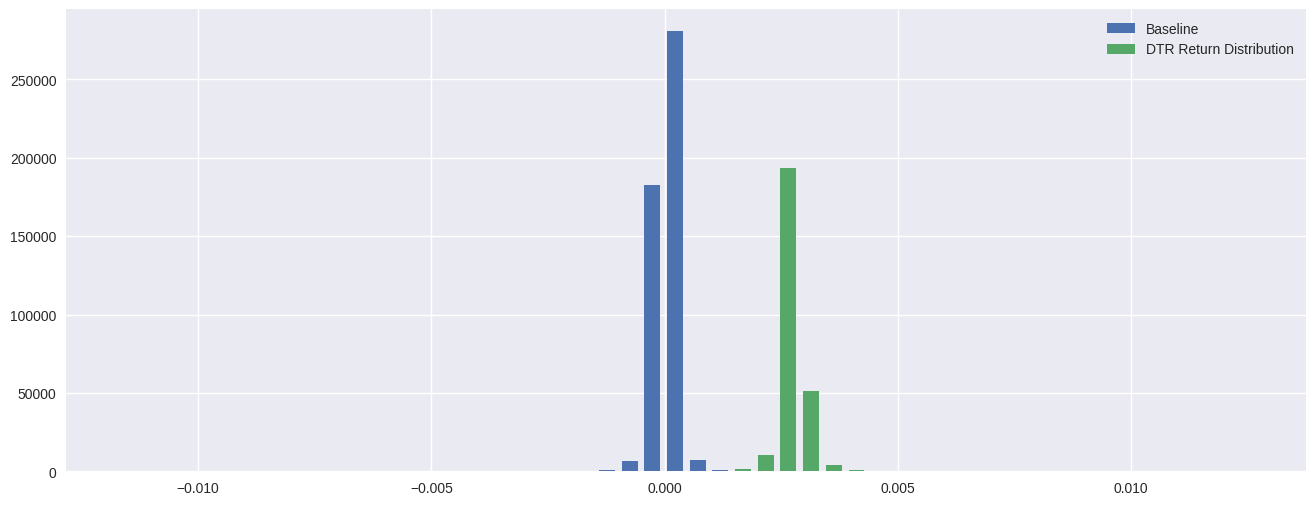

,DTR
count,262370.000000
mean,0.000001
std,0.000231
min,-0.011690
25%,-0.000067
50%,0.000000
75%,0.000070
max,0.007940


In [52]:
fig, ax = plt.subplots(figsize=(16,6))

hist1, bins1 = np.histogram(CompRes['Baseline'].dropna(), bins=50)
width = 0.7 * (bins1[1] - bins1[0])
center = (bins1[:-1] + bins1[1:]) / 2

ax.bar(center, hist1, align='center', width=width, label='Baseline')

hist2, bins2 = np.histogram(CompRes['DTR'].dropna(), bins=50)
ax.bar(center, hist2, align='center', width=width, label='DTR Return Distribution')

plt.legend()
plt.show()

CompRes['DTR'].describe()

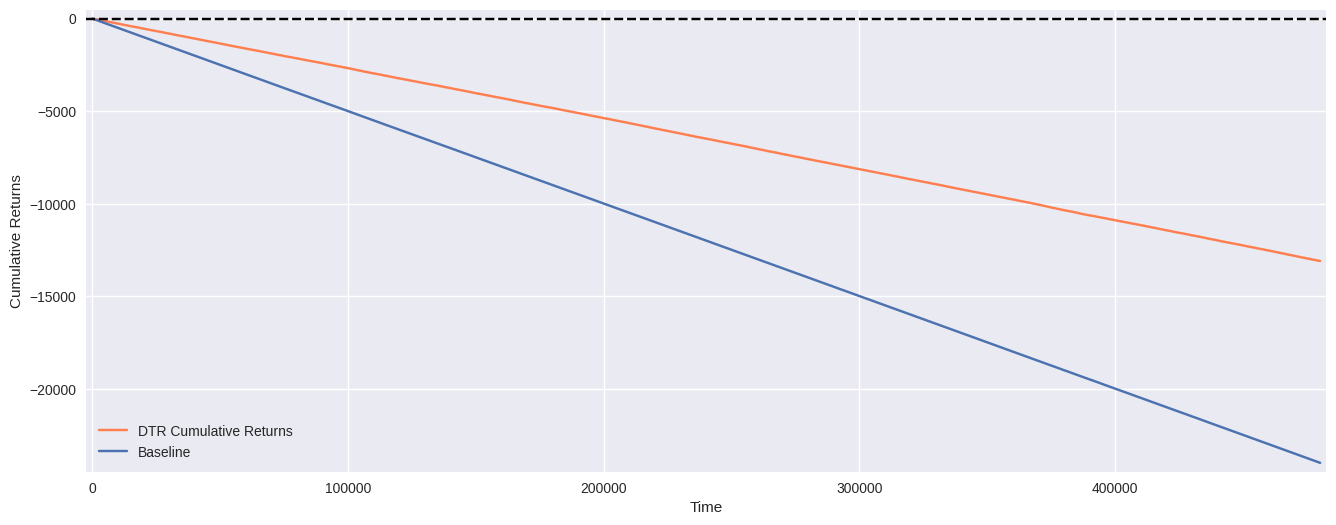

In [53]:
tc = -0.0005 #Simulating 0.05% transaction costs

plt.figure(figsize=(16,6))
plt.plot(((CompRes['DTR'].dropna()+tc).cumsum())*100, color='coral', label='DTR Cumulative Returns')
plt.plot(((CompRes['Baseline']+tc).cumsum())*100, label='Baseline')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

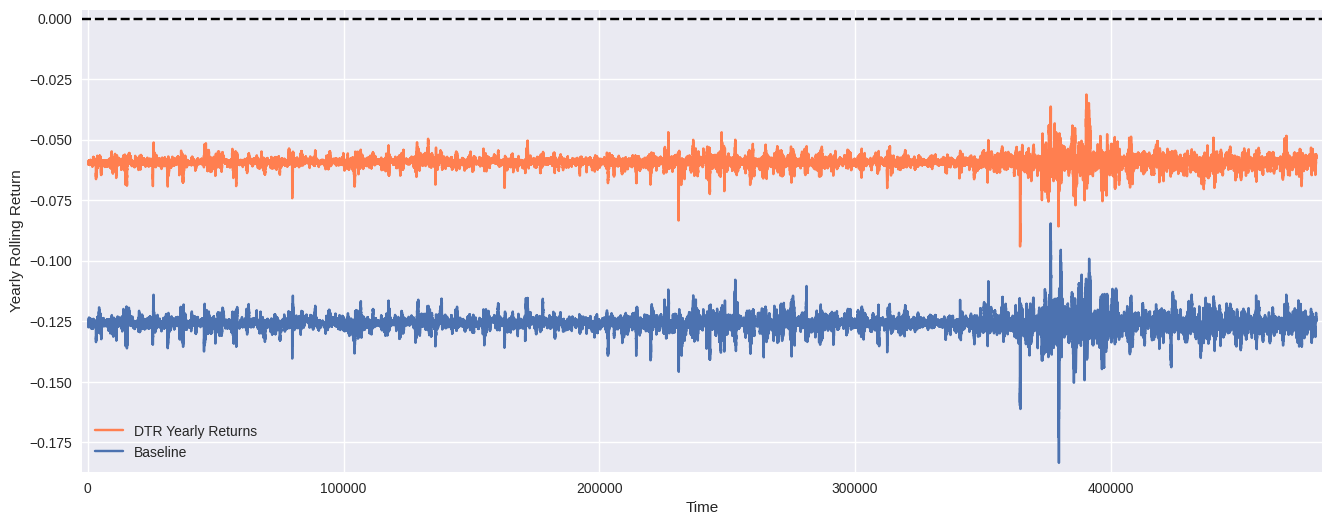

,DTR
count,262252.000000
mean,-0.059358
std,0.002405
min,-0.094104
25%,-0.060254
50%,-0.059284
75%,-0.058343
max,-0.031359


In [54]:
plt.figure(figsize=(16,6))
plt.plot((CompRes['DTR'].dropna()+tc).rolling(window=119).sum(), color='coral', label='DTR Yearly Returns')
plt.plot((CompRes['Baseline']+tc).rolling(window=252).sum(), label='Baseline')
plt.xlabel('Time')
plt.ylabel('Yearly Rolling Return')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
# Descriptive statistics of the strategy rolling yearly return
#(assuming 119 trades per year)
((CompRes['DTR'].dropna()+tc).rolling(window=119).sum()).describe()